# TWITTER SENTIMENT ANALYSIS

A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and 
contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons 
(such as "late flight" or "rude service").

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load Dataset
df = pd.read_csv("Airline_Tweets.csv")

In [3]:
#Do some EDAs.
df.shape

(14640, 15)

In [4]:
Mood = df['airline_sentiment'].value_counts()
Mood

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

Text(0.5,1,'Mood Distribution')

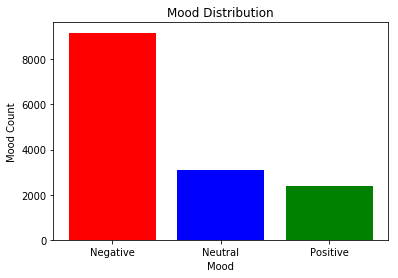

In [5]:
# Positive, negative and neutral
index = [1,2,3]
plt.bar(index,Mood,color=['r','b','g'])
plt.xticks(index,['Negative','Neutral','Positive'])
plt.xlabel('Mood')
plt.ylabel('Mood Count')
plt.title('Mood Distribution')

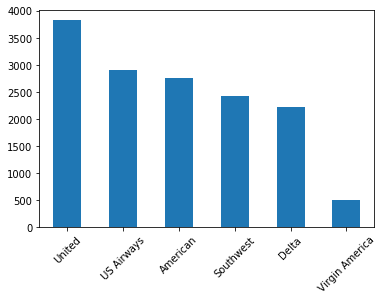

In [6]:
Airline_count = df['airline'].sort_index().value_counts()
Airline_count.plot(kind='bar',rot=45)
plt.show()

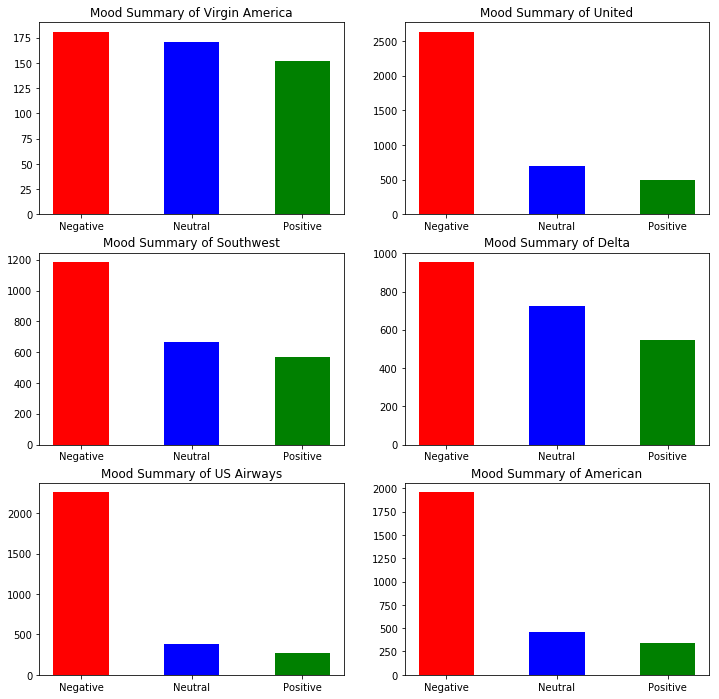

In [7]:
def plot_sub_sentiment(Airline):
    pdf = df[df['airline']==Airline]
    count = pdf['airline_sentiment'].value_counts()
    Index = [1,2,3]
    color = ['red','blue','green']
    plt.bar(Index,count,width=0.5,color=color)
    plt.xticks(Index,['Negative','Neutral','Positive'])
    plt.title('Mood Summary of' + " " + Airline)

airline_name = df['airline'].unique()
plt.figure(1,figsize=(12,12))
for i in range(6):
    plt.subplot(3,2,i+1)
    plot_sub_sentiment(airline_name[i])
plt.show()

In [8]:
NR_Count = dict(df['negativereason'].value_counts(sort=False))
def NR_Count(Airline):
    if Airline=='All':
        NR_df=df
    else:
        NR_df=df[df['airline']==Airline]
    count=dict(NR_df['negativereason'].value_counts())
    Unique_reason=list(df['negativereason'].unique())
    Unique_reason=[x for x in Unique_reason if str(x) != 'nan']
    Reason_frame=pd.DataFrame({'Reasons':Unique_reason})
    Reason_frame['count']=Reason_frame['Reasons'].apply(lambda x: count[x])
    return Reason_frame

def plot_reason(Airline):
    NR_df=NR_Count(Airline)
    count=NR_df['count']
    Index = range(1,(len(NR_df)+1))
    plt.bar(Index,count)
    plt.xticks(Index,NR_df['Reasons'],rotation=90)
    plt.ylabel('Count')
    plt.xlabel('Reason')
    plt.title('Count of Reasons for '+Airline)

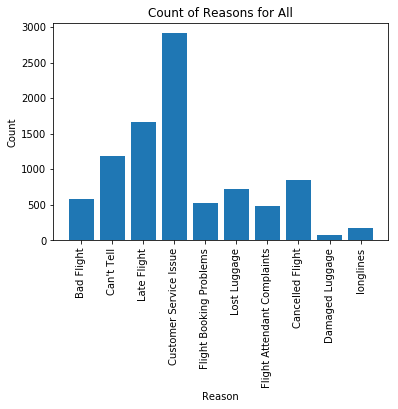

In [9]:
plot_reason('All')
plt.show()

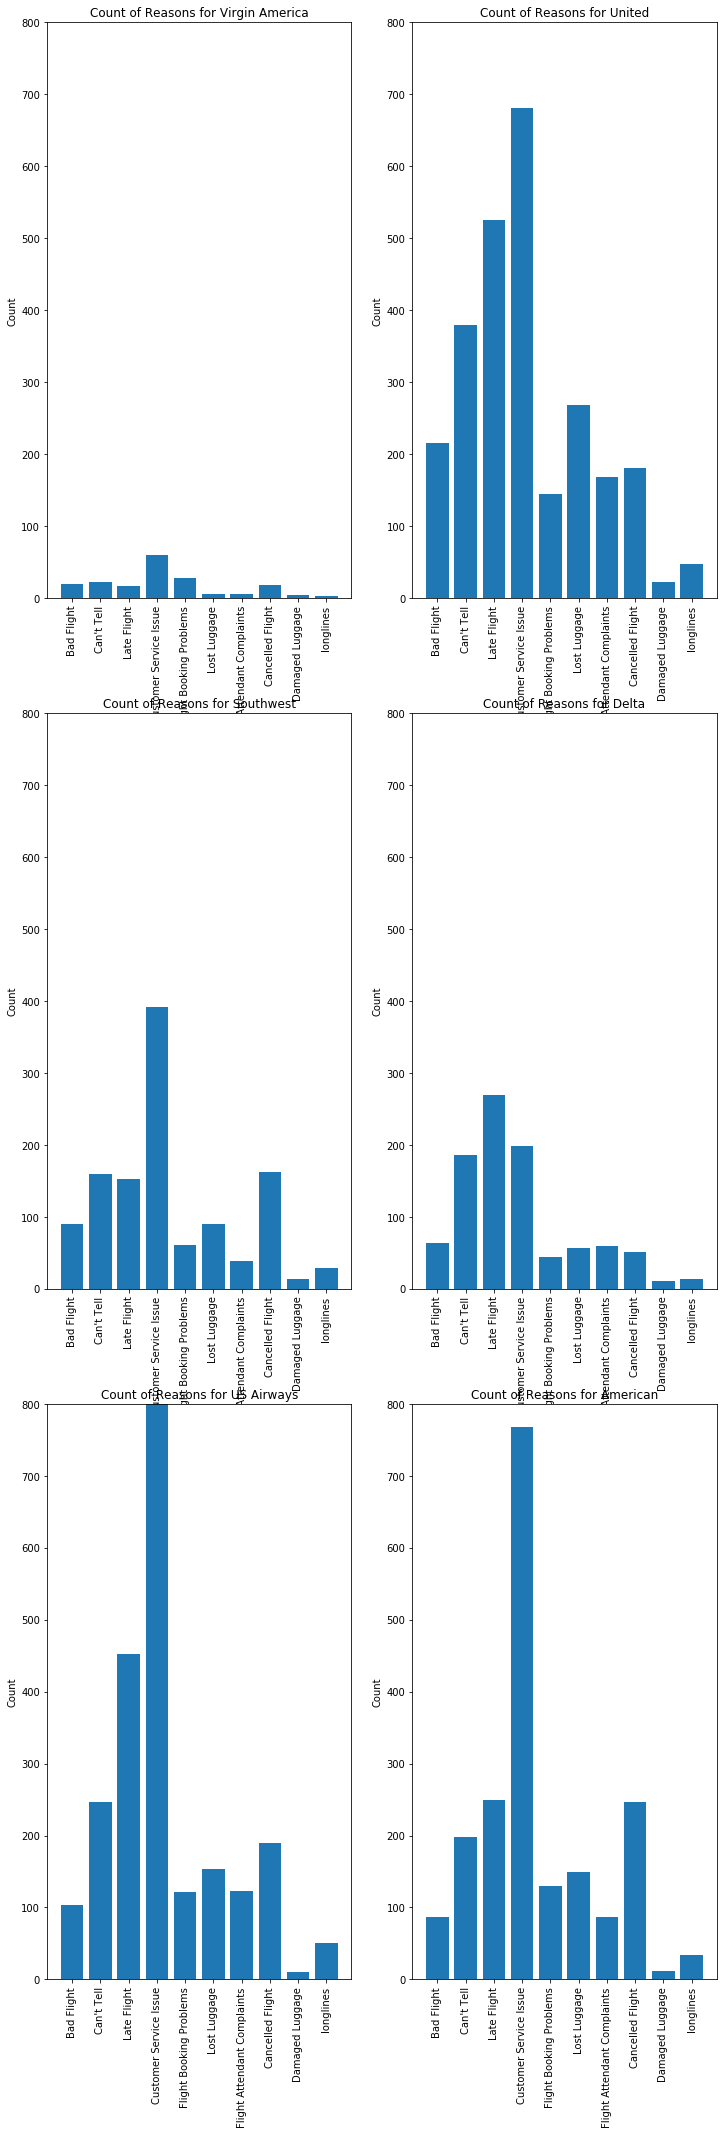

In [10]:
airline_names = df['airline'].unique()
plt.figure(1,figsize=(12,36))
for i in range(0,6):
    plt.subplot(3,2,i+1)
    plot_reason(airline_names[i])
    plt.xlabel('')
    plt.ylim(0,800)
plt.show()